# Loading the Dataset

In [9]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 26.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [46]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=2f0be40193d7ce1c6ec4c5ea8668e144b3239a55ea1217c3db3a9cba9015badc
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# used to create dataset from uploaded json file
import pandas as pd
import json

def create_dataset(json_path, csv_path):
    # Load data from JSON file
    with open(json_path, 'r') as f:
        data = json.load(f)

    # Create DataFrame
    df = pd.DataFrame(data)

    # Write DataFrame to CSV
    df.to_csv(csv_path, index=False)

    return df

# json_path = 'data.json'
# csv_path = 'train_data.csv'
# data = create_dataset(json_path, csv_path)

file_path = '/content/drive/MyDrive/kubesense/dataset/updted_data_with_class.json'
data = create_dataset(file_path, 'data.csv')

In [ ]:
data.head()

,prompt,command,type
0,Please create a namespace named 'production'.,kubectl create namespace <name>,create
1,Could you set up a namespace called 'testing'?,kubectl create namespace <name>,create
2,Let's create a namespace for our development e...,kubectl create namespace <name>,create
3,I need a namespace for our frontend services. ...,kubectl create namespace <name>,create
4,We require a namespace named 'backend' for our...,kubectl create namespace <name>,create


In [ ]:
data['command'].unique()

array(['kubectl create namespace <name>',
       'kubectl delete namespace <name>', 'kubectl get namespaces',
       'kubectl apply -f <name>', 'kubectl describe pod <name> -n <name>',
       'kubectl describe svc <name> -n <name>',
       'kubectl describe deployment <name> -n <name>',
       'kubectl describe statefulset <name> -n <namespace>',
       'kubectl delete pod <name> -n <name>',
       'kubectl delete service <name> -n <name>',
       'kubectl delete deployment <name> -n <name>',
       'kubectl delete statefulset <name> -n <name>',
       'kubectl delete secret secret_name', 'kubectl get pods -n <name>',
       'kubectl get services -n <name>',
       'kubectl get deployments -n <name>',
       'kubectl get statefulsets -n <name>',
       'kubectl get configmaps -n <name>',
       'kubectl get secrets -n <name>',
       'kubectl edit svc <name> -n <name>',
       'kubectl edit statefulset <name> -n <name>'], dtype=object)

# EDA

First few rows of the dataset:
                                              prompt  \
0      Please create a namespace named 'production'.   
1     Could you set up a namespace called 'testing'?   
2  Let's create a namespace for our development e...   
3  I need a namespace for our frontend services. ...   
4  We require a namespace named 'backend' for our...   

                           command    type  prompt_length  command_length  
0  kubectl create namespace <name>  create              6               4  
1  kubectl create namespace <name>  create              8               4  
2  kubectl create namespace <name>  create             11               4  
3  kubectl create namespace <name>  create             12               4  
4  kubectl create namespace <name>  create             14               4  

Summary statistics:
       prompt_length  command_length
count     402.000000      402.000000
mean       11.134328        5.092040
std         2.819927        0.914819
min    

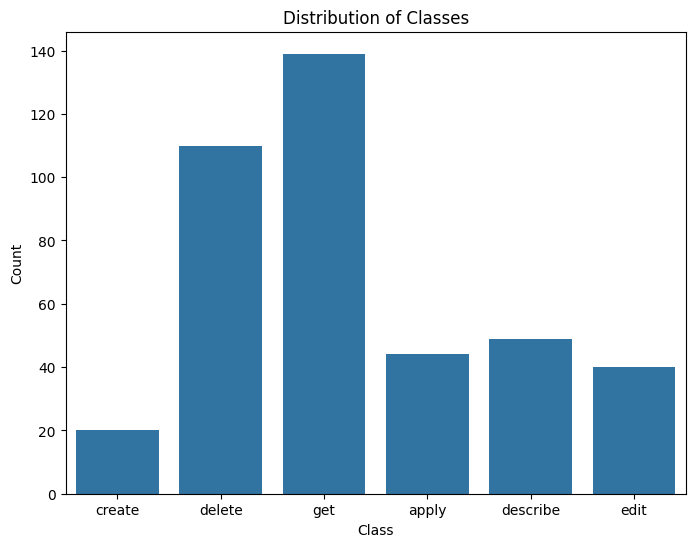

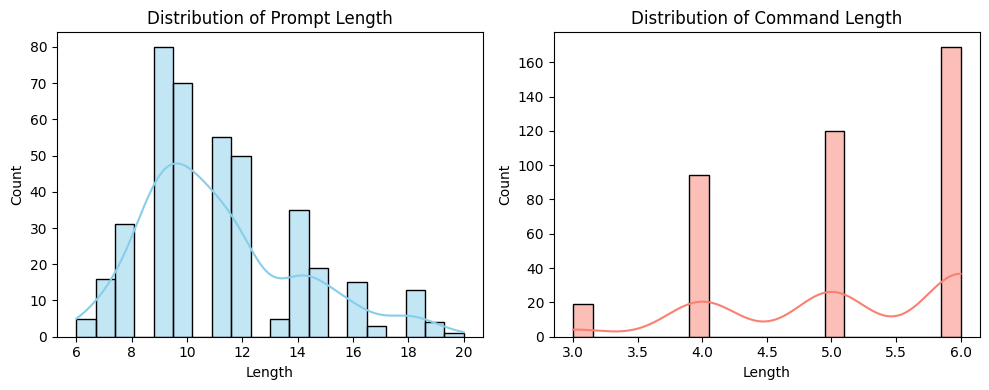

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Summary statistics
print("\nSummary statistics:")
print(data.describe())

# Distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=data)
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Text analysis: Word lengths
data['prompt_length'] = data['prompt'].apply(lambda x: len(x.split()))
data['command_length'] = data['command'].apply(lambda x: len(x.split()))

# Plot histograms of word lengths
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(data['prompt_length'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Prompt Length")
plt.xlabel("Length")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(data['command_length'], bins=20, kde=True, color='salmon')
plt.title("Distribution of Command Length")
plt.xlabel("Length")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

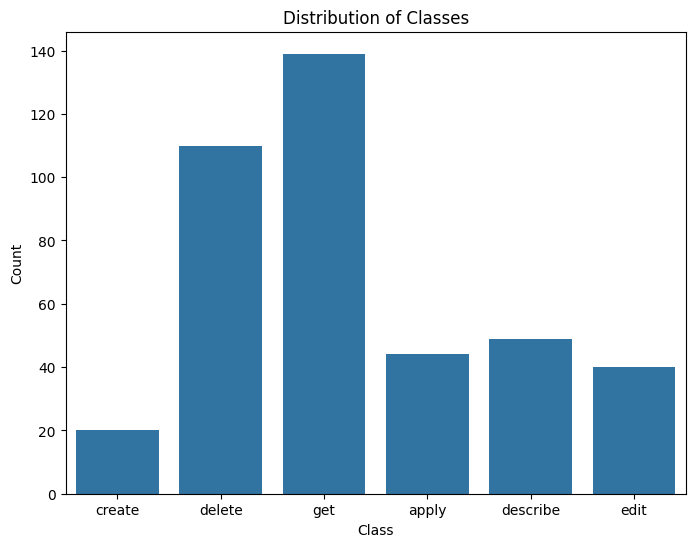

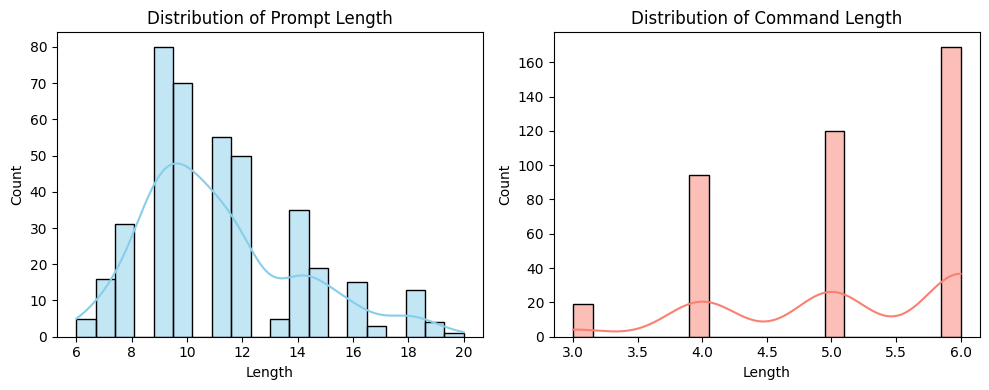

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=data)
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Text analysis: Word lengths
data['prompt_length'] = data['prompt'].apply(lambda x: len(x.split()))
data['command_length'] = data['command'].apply(lambda x: len(x.split()))

# Plot histograms of word lengths
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(data['prompt_length'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Prompt Length")
plt.xlabel("Length")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(data['command_length'], bins=20, kde=True, color='salmon')
plt.title("Distribution of Command Length")
plt.xlabel("Length")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Using Custom Multi-model approach mimicking a Seq2Seq model

In [ ]:
!pip install scipy==1.7.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 26.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires scipy>=1.8.0, but you have scipy 1.7.3 which is incompatible.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.22.4 which is incompatible.
jax 0.4.26 requires scipy>=1.9, but you have scipy 1.7.3 which is incompatible.
jaxlib 0.4.26+cuda12.cudnn89 requires scipy>=1.9, but you have scipy 1.7.3 which is incompatible.
pandas-stubs 2

In [ ]:
import scipy
print(scipy.__version__)

1.7.3


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import joblib
import pickle


# Extract features and labels
X = list(data['prompt'])
y = list(data['type'])

def svm_classify(X_test,y, prompt):
  # Label encoding
  label_encoder = LabelEncoder()
  y_encoded = label_encoder.fit_transform(y)

  # Split dataset into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

  # Vectorize text data using TF-IDF
  tfidf_vectorizer = TfidfVectorizer()
  X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
  X_test_tfidf = tfidf_vectorizer.transform(X_test)

  # Train a Support Vector Machine classifier
  svm_classifier = SVC(kernel='linear')
  svm_classifier.fit(X_train_tfidf, y_train)

  # Evaluate the classifier
  y_pred = svm_classifier.predict(X_test_tfidf)
  report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

  # with open('pickle/svm_classifier_model.pkl', 'wb') as f:
  #   pickle.dump(svm_classifier, f)

  # # Save the TF-IDF vectorizer
  # with open('pickle/tfidf_vectorizer.pkl', 'wb') as f:
  #     pickle.dump(tfidf_vectorizer, f)

  # # Save the label encoder
  # with open('pickle/label_encoder.pkl', 'wb') as f:
  #     pickle.dump(label_encoder, f)

  # Example prediction
  new_prompt_tfidf = tfidf_vectorizer.transform([prompt])
  predicted_label = svm_classifier.predict(new_prompt_tfidf)
  predicted_type = label_encoder.inverse_transform(predicted_label)

  return predicted_type

In [ ]:
# import pickle

# def load_and_predict(prompt):
#     # Load the saved model
#     with open('pickle/svm_classifier_model.pkl', 'rb') as f:
#         svm_classifier = pickle.load(f)
#     with open('pickle/tfidf_vectorizer.pkl', 'rb') as f:
#         tfidf_vectorizer = pickle.load(f)
#     with open('pickle/label_encoder.pkl', 'rb') as f:
#         label_encoder = pickle.load(f)

#     # Preprocess the prompt
#     prompt_tfidf = tfidf_vectorizer.transform([prompt])

#     # Make predictions
#     predicted_label = svm_classifier.predict(prompt_tfidf)
#     predicted_type = label_encoder.inverse_transform(predicted_label)

#     return predicted_type

# # Example usage
# predicted_type = load_and_predict("i want to delete a namespace")
# print(predicted_type)

['delete']


Generating embeddings

In [32]:
from transformers import BertTokenizer, BertModel
from transformers import RobertaTokenizer, RobertaModel
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def generate_embedding(tokenizer, model, user_input):

  # Tokenize the input text
  tokenized_input = tokenizer.encode(user_input, add_special_tokens=True, max_length=128, truncation=True)

  # Convert tokens to a PyTorch tensor
  input_tensor = torch.tensor(tokenized_input).to(device)

  # Add batch dimension
  input_tensor = input_tensor.unsqueeze(0).to(device)  # Add batch dimension

  # Pass the input tensor through the BERT model
  with torch.no_grad():
    outputs = model(input_tensor)

  # Extract the embeddings from the BERT model outputs
  last_hidden_state = outputs.last_hidden_state

  # Extract embeddings for the first token ([CLS] token)
  embedding = last_hidden_state[:, 0, :]

  return embedding

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from collections import Counter

# Function to calculate cosine similarity between two embeddings
def calculate_similarity(target_embedding, dataset_embeddings):
    # Convert target embedding and dataset embeddings to numpy arrays
    target_embedding_np = target_embedding.cpu().numpy()
    dataset_embeddings_np = dataset_embeddings.cpu().numpy()

    # Calculate cosine similarity between the target embedding and each embedding in the dataset
    similarities = cosine_similarity(target_embedding_np, dataset_embeddings_np)
    return similarities.squeeze()

# function to get closest matches of commands
def get_closest_matches(similarities, command_type, k=10):
    # Rank dataset examples based on similarity
    ranked_indices = np.argsort(similarities)[::-1]
    # print('ranked indices: ', ranked_indices)

    # Get the top-k closest matches
    closest_matches_indices = ranked_indices[:k]
    # print(closest_matches_indices)

    filtered_user_prompts = [prompt for prompt, prompt_type in zip(data['command'], data['type']) if prompt_type == command_type]

    # Extract the corresponding kubectl commands
    closest_matches_commands = [filtered_user_prompts[i] for i in closest_matches_indices]

    return closest_matches_commands

# Function to get the most occurring command from a list of commands
def get_most_occurring_command(commands):
    # occurrences of each command
    command_counts = Counter(commands)

    # most common command and its count
    most_common_command, count = command_counts.most_common(1)[0]

    return most_common_command



# driver function
def generate_command(user_prompt):
  command_type = svm_classify(X, y, user_prompt)
  print('Command type: ', command_type)

  # List of user inputs filtered based on the classified command type
  filtered_user_inputs = [prompt for prompt, prompt_type in zip(data['prompt'], data['type']) if prompt_type == command_type]

  # Initialize a list to store the embeddings
  embeddings = []

  # Loop through each user input
  for user_input in filtered_user_inputs:
      embedding = generate_embedding(tokenizer, model, user_input)

      # Append the embedding to the list of embeddings
      embeddings.append(embedding)

  # Concatenate the embeddings along the batch dimension
  embeddings_tensor = torch.cat(embeddings, dim=0)

  # Print the shape of the embeddings tensor
  # print("Shape of the embeddings tensor:", embeddings_tensor.shape)

  target_embedding = generate_embedding(tokenizer, model, user_prompt)

  # Calculate similarity with each embedding in the dataset
  similarities = calculate_similarity(target_embedding, embeddings_tensor)


  closest_matches_commands = get_closest_matches(similarities, command_type)

  # Get the most occurring command from the list of closest matches commands
  most_occurring_command = get_most_occurring_command(closest_matches_commands)
  return most_occurring_command

In [34]:
def entity_replacing(prompt, generated_command_template):
  # Extract resource name and namespace from the prompt
  # resource_name = prompt.split("resource:")[1].split(" ")[0]
  resource_name = prompt.lower().split("resource:")[1].strip().split(" ")[0]
  # namespace = prompt.split("namespace:")[1].split(" ")[0]
  namespace = prompt.lower().split("namespace:")[1].strip().split(" ")[0]

  print("resource", resource_name)
  print("ns: ", namespace)

  # Replace placeholders in the command with extracted values
  formatted_command = generated_command_template.replace("<name>", resource_name, 1).replace("<name>", namespace, 1)

  print("Prompt:", prompt)
  print("Command:", formatted_command)
  return formatted_command

# entity_replacing(prompt, generated_command_template)

In [35]:
print('-----------Kubesense-----------')
print('   ')
prompt = "I want to delete the service resource:svc in the namespace:x"
kubectl_command_template = generate_command(prompt)
print('   ')
print('Generated kubectl command: ', kubectl_command_template)

-----------Kubesense-----------
   
Command type:  ['delete']
   
Generated kubectl command:  kubectl delete service <name> -n <name>


In [37]:
# testing
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
import evaluate
import pandas as pd
from sklearn.model_selection import train_test_split

user_prompts = data['prompt']
commands = data['command']

# Splitting the data into training and testing sets
X_train_prompts, X_test_prompts, y_train_commands, y_test_commands = train_test_split(user_prompts, commands, test_size=0.2, random_state=42)

true_commands = y_test_commands
pred_commands = []

print("Testing:")
for index, datapoint in enumerate(X_test_prompts):
  print(f"{index}/ {len(X_test_prompts)}")
  pred = generate_command(datapoint)
  pred_commands.append(pred)

metric = evaluate.load("bleu")
bleu = metric.compute(predictions=pred_commands, references=true_commands)

print("BLEU Score:", bleu)

Testing:
0/ 81
Command type:  ['get']
1/ 81
Command type:  ['get']
2/ 81
Command type:  ['create']
3/ 81
Command type:  ['delete']
4/ 81
Command type:  ['apply']
5/ 81
Command type:  ['apply']
6/ 81
Command type:  ['edit']
7/ 81
Command type:  ['apply']
8/ 81
Command type:  ['delete']
9/ 81
Command type:  ['describe']
10/ 81
Command type:  ['delete']
11/ 81
Command type:  ['edit']
12/ 81
Command type:  ['get']
13/ 81
Command type:  ['apply']
14/ 81
Command type:  ['describe']
15/ 81
Command type:  ['get']
16/ 81
Command type:  ['get']
17/ 81
Command type:  ['get']
18/ 81
Command type:  ['delete']
19/ 81
Command type:  ['delete']
20/ 81
Command type:  ['apply']
21/ 81
Command type:  ['create']
22/ 81
Command type:  ['edit']
23/ 81
Command type:  ['get']
24/ 81
Command type:  ['create']
25/ 81
Command type:  ['edit']
26/ 81
Command type:  ['describe']
27/ 81
Command type:  ['get']
28/ 81
Command type:  ['edit']
29/ 81
Command type:  ['describe']
30/ 81
Command type:  ['edit']
31/ 81
Comm

NameError: name 'pred_command' is not defined

In [43]:
metric = evaluate.load("bleu")
bleu = metric.compute(predictions=pred_commands, references=true_commands)

print("BLEU Score:", bleu)
test_bleu = pd.DataFrame(bleu)
test_bleu

BLEU Score: {'bleu': 0.9605842949983288, 'precisions': [0.9822866344605475, 0.9666666666666667, 0.9520697167755992, 0.9417989417989417], 'brevity_penalty': 1.0, 'length_ratio': 1.006482982171799, 'translation_length': 621, 'reference_length': 617}


,bleu,precisions,brevity_penalty,length_ratio,translation_length,reference_length
0,0.960584,0.982287,1.0,1.006483,621,617
1,0.960584,0.966667,1.0,1.006483,621,617
2,0.960584,0.952070,1.0,1.006483,621,617
3,0.960584,0.941799,1.0,1.006483,621,617


In [52]:
rouge = evaluate.load("rouge")
rouge = rouge.compute(predictions=pred_commands, references=true_commands)

print("Rouge Score:", rouge)
test_rouge = pd.DataFrame(rouge.items(), columns=['Metric', 'Score'])
test_rouge

Rouge Score: {'rouge1': 0.9814814814814815, 'rouge2': 0.9580246913580246, 'rougeL': 0.9814814814814815, 'rougeLsum': 0.9814814814814813}


,Metric,Score
0,rouge1,0.981481
1,rouge2,0.958025
2,rougeL,0.981481
3,rougeLsum,0.981481


In [17]:
print(X_test_prompts)

285    Can you show me the deployments in the 'namesp...
281    Can you show me the services in the 'namespace...
33     Could you delete the namespace named 'backend'...
211    Can you delete the deployment named 'deploymen...
93         Let's set up the cron job using cronjob.yaml.
                             ...                        
79     Let's create a persistent volume claim with th...
286    I need to see the deployments in the 'namespac...
358    I want to view the secrets in the 'namespace1'...
382    i want to edit the statefulset statefulset_nam...
157    Delete the pod named 'cache-pod' for me, pleas...
Name: prompt, Length: 121, dtype: object


In [ ]:
# entity replacing is done seperately due to testing requirements
kubectl_command = entity_replacing(prompt, kubectl_command_template)
print("[SUCCESS] Final command: ", kubectl_command)

In [ ]:
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics.pairwise import euclidean_distances


# target_text = "Service: Can you delete the service named 'x'?"
# target_text2 = "Pod: can you delete the pod 'x'"

# target_embedding1 = generate_embedding(tokenizer, model, target_text)
# target_embedding2 = generate_embedding(tokenizer, model, target_text2)

# target_embedding1 = target_embedding1.numpy()
# target_embedding2 = target_embedding2.numpy()

# # Reshape the arrays to match the expected input shape of cosine_similarity
# # target_embedding1 = target_embedding1.reshape(1, -1)
# # target_embedding2 = target_embedding2.reshape(1, -1)

# # Calculate cosine similarity
# similarity = cosine_similarity(target_embedding1, target_embedding2)[0][0]
# print(similarity)



# # Calculate Euclidean distance
# euclidean_dist = euclidean_distances(target_embedding1, target_embedding2)[0][0]
# print(euclidean_dist)


0.93688947
5.052328


# Using LLM: Bart


In [ ]:
from transformers import BartForConditionalGeneration, BartTokenizer, BartConfig
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.nn as nn
import torch
from sklearn.model_selection import train_test_split
import numpy as np
import pickle

# Define Dataset class
class KubectlDataset(Dataset):
    def __init__(self, prompts, commands, tokenizer):
        self.prompts = prompts
        self.commands = commands
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.prompts)

    def __getitem__(self, idx):
        prompt = self.prompts[idx]
        command = self.commands[idx]
        return prompt, command


prompts = list(data['prompt'])
commands = list(data['command'])

train_prompts, valid_prompts, train_commands, valid_commands = train_test_split(prompts, commands, test_size=0.2, random_state=42)

# Load pre-trained BART model and tokenizer
model_name = 'facebook/bart-large'
tokenizer = BartTokenizer.from_pretrained(model_name)
config = BartConfig.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name, config=config)

# Prepare dataset
train_dataset = KubectlDataset(train_prompts, train_commands, tokenizer)
valid_dataset = KubectlDataset(valid_prompts, valid_commands, tokenizer)

# Define DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# Fine-tuning parameters
lr = 3e-5
num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define optimizer and loss function
optimizer = optim.AdamW(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

# Early stopping parameters
patience = 3  # Number of epochs to wait before early stopping
best_valid_loss = float('inf')
early_stopping_counter = 0

# Fine-tuning loop
model.to(device)
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        prompts, commands = batch
        input_ids = tokenizer(prompts, return_tensors='pt', padding=True, truncation=True).input_ids.to(device)
        labels = tokenizer(commands, return_tensors='pt', padding=True, truncation=True).input_ids.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Validation loop
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for batch in valid_loader:
            prompts, commands = batch
            input_ids = tokenizer(prompts, return_tensors='pt', padding=True, truncation=True).input_ids.to(device)
            labels = tokenizer(commands, return_tensors='pt', padding=True, truncation=True).input_ids.to(device)

            outputs = model(input_ids=input_ids, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

    # Calculate average validation loss
    avg_valid_loss = total_loss / len(valid_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {avg_valid_loss}')

    # Check for early stopping
    if avg_valid_loss < best_valid_loss:
        best_valid_loss = avg_valid_loss
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print(f'Early stopping at epoch {epoch+1} with best validation loss: {best_valid_loss}')
            break

# # Save fine-tuned BART model
# torch.save(model.state_dict(), 'fine_tuned_bart_model.pth')

# # Save tokenizer using pickle
# with open('tokenizer.pkl', 'wb') as f:
#     pickle.dump(tokenizer, f)

# Text generation
user_prompt = "Deploy the application"
input_ids = tokenizer.encode(user_prompt, return_tensors="pt").to(device)
generated_ids = model.generate(input_ids=input_ids, max_length=50, num_beams=4, early_stopping=True)
generated_command = tokenizer.decode(generated_ids[0], skip_special_tokens=True)

print(f'User Prompt: {user_prompt}')
print(f'Generated kubectl Command: {generated_command}')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

Epoch 1/20, Validation Loss: 3.565070152282715
Epoch 2/20, Validation Loss: 3.0845888455708823
Epoch 3/20, Validation Loss: 2.6146887938181558
Epoch 4/20, Validation Loss: 1.7554157574971516
Epoch 5/20, Validation Loss: 1.4719357093175252
Epoch 6/20, Validation Loss: 1.2414016723632812
Epoch 7/20, Validation Loss: 1.0754407842954
Epoch 8/20, Validation Loss: 0.8454322616259257
Epoch 9/20, Validation Loss: 0.6289126674334208
Epoch 10/20, Validation Loss: 0.47545496622721356
Epoch 11/20, Validation Loss: 0.32966041564941406
Epoch 12/20, Validation Loss: 0.5948658386866251
Epoch 13/20, Validation Loss: 0.31264357765515643
Epoch 14/20, Validation Loss: 0.1182616154352824
Epoch 15/20, Validation Loss: 0.1999390870332718
Epoch 16/20, Validation Loss: 0.14324082930882773
Epoch 17/20, Validation Loss: 0.09871727724870046
Epoch 18/20, Validation Loss: 0.09275236229101817
Epoch 19/20, Validation Loss: 0.11015520989894867
Epoch 20/20, Validation Loss: 0.08677347004413605
User Prompt: Deploy the a

In [ ]:
# Text generation
# user_prompt = "Can you create a namespace called 'x'"
user_prompt = "i want to delete the pod 'pod' in the namespace 'x'"
input_ids = tokenizer.encode(user_prompt, return_tensors="pt").to(device)
generated_ids = model.generate(input_ids=input_ids, max_length=50, num_beams=4, early_stopping=True)
generated_command = tokenizer.decode(generated_ids[0], skip_special_tokens=True)

print(f'User Prompt: {user_prompt}')
print(f'Generated kubectl Command: {generated_command}')

User Prompt: i want to delete the pod 'pod' in the namespace 'x'
Generated kubectl Command: kubectl delete pod <name> -n <name>)


In [55]:
# Testing
# loading model and tokenizer from file
import torch
import pickle
from transformers import BartForConditionalGeneration, BartTokenizer
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
import evaluate
from sklearn.model_selection import train_test_split

# Load fine-tuned BART model
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large')
model.load_state_dict(torch.load('/content/drive/MyDrive/fine_tuned_bart_model.pth', map_location=torch.device('cpu')))
model.eval()

# Load tokenizer using pickle
# with open('/content/drive/MyDrive/tokenizer.pkl', 'rb') as f:
#     tokenizer = pickle.load(f)

tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')

true_commands_llm = y_test_commands
pred_commands_llm = []

# testing of LLM
print("Testing:")
for index, datapoint in enumerate(X_test_prompts):
  print(f"{index}/ {len(X_test_prompts)}")

  user_prompt = datapoint
  input_ids = tokenizer.encode(user_prompt, return_tensors="pt")
  generated_ids = model.generate(input_ids=input_ids, max_length=50, num_beams=4, early_stopping=True)
  generated_command = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
  pred_commands_llm.append(generated_command)

metric = evaluate.load("bleu")
bleu = metric.compute(predictions=pred_commands_llm, references=true_commands_llm)

print("BLEU Score:", bleu)

# user_prompt = "Deploy the application"
# input_ids = tokenizer.encode(user_prompt, return_tensors="pt")
# generated_ids = model.generate(input_ids=input_ids, max_length=50, num_beams=4, early_stopping=True)
# generated_command = tokenizer.decode(generated_ids[0], skip_special_tokens=True)

# print(f'User Prompt: {user_prompt}')
# print(f'Generated kubectl Command: {generated_command}')

Testing:
0/ 81
1/ 81
2/ 81
3/ 81
4/ 81
5/ 81
6/ 81
7/ 81
8/ 81
9/ 81
10/ 81
11/ 81
12/ 81
13/ 81
14/ 81
15/ 81
16/ 81
17/ 81
18/ 81
19/ 81
20/ 81
21/ 81
22/ 81
23/ 81
24/ 81
25/ 81
26/ 81
27/ 81
28/ 81
29/ 81
30/ 81
31/ 81
32/ 81
33/ 81
34/ 81
35/ 81
36/ 81
37/ 81
38/ 81
39/ 81
40/ 81
41/ 81
42/ 81
43/ 81
44/ 81
45/ 81
46/ 81
47/ 81
48/ 81
49/ 81
50/ 81
51/ 81
52/ 81
53/ 81
54/ 81
55/ 81
56/ 81
57/ 81
58/ 81
59/ 81
60/ 81
61/ 81
62/ 81
63/ 81
64/ 81
65/ 81
66/ 81
67/ 81
68/ 81
69/ 81
70/ 81
71/ 81
72/ 81
73/ 81
74/ 81
75/ 81
76/ 81
77/ 81
78/ 81
79/ 81
80/ 81
BLEU Score: {'bleu': 0.9289296192880198, 'precisions': [0.953125, 0.9338103756708408, 0.9225941422594143, 0.906801007556675], 'brevity_penalty': 1.0, 'length_ratio': 1.0372771474878444, 'translation_length': 640, 'reference_length': 617}


In [56]:
metric = evaluate.load("bleu")
bleu_llm = metric.compute(predictions=pred_commands_llm, references=true_commands_llm)

print("BLEU Score:", bleu_llm)
test_bleu_llm = pd.DataFrame(bleu_llm)
test_bleu_llm

BLEU Score: {'bleu': 0.9289296192880198, 'precisions': [0.953125, 0.9338103756708408, 0.9225941422594143, 0.906801007556675], 'brevity_penalty': 1.0, 'length_ratio': 1.0372771474878444, 'translation_length': 640, 'reference_length': 617}


,bleu,precisions,brevity_penalty,length_ratio,translation_length,reference_length
0,0.92893,0.953125,1.0,1.037277,640,617
1,0.92893,0.933810,1.0,1.037277,640,617
2,0.92893,0.922594,1.0,1.037277,640,617
3,0.92893,0.906801,1.0,1.037277,640,617


In [58]:
rouge_llm = evaluate.load("rouge")
rouge_llm = rouge_llm.compute(predictions=pred_commands_llm, references=true_commands_llm)

print("BLEU Score:", rouge_llm)
test_rouge_llm = pd.DataFrame(rouge_llm.items(), columns=['Metric', 'Score'])

test_rouge_llm

BLEU Score: {'rouge1': 0.9855967078189299, 'rouge2': 0.982716049382716, 'rougeL': 0.9855967078189302, 'rougeLsum': 0.9855967078189302}


,Metric,Score
0,rouge1,0.985597
1,rouge2,0.982716
2,rougeL,0.985597
3,rougeLsum,0.985597


In [ ]:
def entity_replacing(prompt, generated_command_template):
    # Extract resource name and namespace from the prompt

    if "resource:" in prompt and "namespace:" in prompt:
      print("both")
      resource_name = prompt.lower().split("resource:")[1].strip().split(" ")[0]
      # namespace = prompt.split("namespace:")[1].split(" ")[0]
      namespace = prompt.lower().split("namespace:")[1].strip().split(" ")[0]

      formatted_command = generated_command_template.replace("<name>", resource_name, 1).replace("<name>", namespace,1)
      return formatted_command
    elif "namespace:" in prompt and "resource:" not in prompt:
      "only ns"
      namespace = prompt.lower().split("namespace:")[1].strip().split(" ")[0]
      formatted_command = generated_command_template.replace("<name>", namespace)
      return formatted_command
    else:
      "none"
      print("[INFO] No resources or namespaces specified in the prompt")
      return generated_command_template


prompt = "i want to get the services in the namespace:pod1" # in the namespace:xin"
com_temp = "kubectl get svc -n <name>"
x = entity_replacing(prompt, com_temp)
print(x)

kubectl get svc -n pod1


In [ ]:
def custom_ensemble(user_input, model1_pred, model2_pred):

    resource_types = ['pod', 'svc', 'statefulset', 'secret', 'namespaces']

    if model1_pred == model2_pred:
        print('[INFO] Both models have identical predictions')
        return model1_pred
    else:
        for res in resource_types:
            if res in user_input:
                if res in model1_pred:
                    print(
                        '[INFO] The ensemble prediction has been successfully generated based on the combined outputs of multiple models. This decision reflects the culmination of the predictive capabilities of the constituent models, ensuring a robust and informed course of action')
                    return model1_pred
                elif res in model2_pred:
                    print(
                        '[INFO] The ensemble prediction has been successfully generated based on the combined outputs of multiple models. This decision reflects the culmination of the predictive capabilities of the constituent models, ensuring a robust and informed course of action')
                    return model2_pred


model1_pred = "kubectl get configmaps -n <name>"
model2_pred = "kubectl get namespaces"
user_input = "Can I view the namespaces available in the cluster"

x = custom_ensemble(user_input, model1_pred, model2_pred)
print(x)


[INFO] The ensemble prediction has been successfully generated based on the combined outputs of multiple models. This decision reflects the culmination of the predictive capabilities of the constituent models, ensuring a robust and informed course of action
kubectl get namespaces


# Experimented Model

In [ ]:
# when giving the prompt, make sure the resource is listed as 'svc' not 'servie'
# avoid any typos
prompt = "Can show me the a pods in the namespace:malitha"

predictions_model2 = "kubectl get pods -n <name>"
predictions_model1 = "kubectl get svc -n <name>"


# custom ensemble approach
def custom_ensemble(prompt, model1_pred, model2_pred):

  resource_types = ['pod', 'svc', 'statefulset', 'secret']

  if model1_pred == model2_pred:
    print('[INFO] Both models have identical predictions')
    return model1_pred
  else:
    for res in resource_types:
      if res in prompt:
        if res in model1_pred:
          print('[INFO] The ensemble prediction has been successfully generated based on the combined outputs of multiple models. This decision reflects the culmination of the predictive capabilities of the constituent models, ensuring a robust and informed course of action')
          return model1_pred
        elif res in model2_pred:
          print('[INFO] The ensemble prediction has been successfully generated based on the combined outputs of multiple models. This decision reflects the culmination of the predictive capabilities of the constituent models, ensuring a robust and informed course of action')
          return model2_pred


print("[INFO] Kubectl Command: ", custom_ensemble(prompt, predictions_model1, predictions_model2))

[INFO] The ensemble prediction has been successfully generated based on the combined outputs of multiple models. This decision reflects the culmination of the predictive capabilities of the constituent models, ensuring a robust and informed course of action
[INFO] Kubectl Command:  kubectl get pods -n <name>


In [ ]:
data['type'].unique()

array(['create', 'delete', 'get', 'apply', 'describe', 'edit'],
      dtype=object)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Example dataset
user_prompts = ['i want to create a namespace: malitha', 'show all pods in namespace: default']
kubectl_commands = ['kubectl create namespace malitha', 'kubectl get pods -n default']

# Tokenization
class Vocabulary:
    def __init__(self):
        self.word2index = {}
        self.index2word = {}
        self.num_words = 0

    def add_word(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.num_words
            self.index2word[self.num_words] = word
            self.num_words += 1

    def get_index(self, word):
        return self.word2index[word]

    def get_word(self, index):
        return self.index2word[index]

def tokenize_data(data):
    tokens = []
    for sentence in data:
        tokens.append(sentence.split())
    return tokens

# Vocabulary creation
def create_vocabulary(data):
    vocabulary = Vocabulary()
    vocabulary.add_word('<start>')
    vocabulary.add_word('<end>')
    for sentence in data:
        for token in sentence.split():
            vocabulary.add_word(token)
    return vocabulary

input_vocab = create_vocabulary(user_prompts)
output_vocab = create_vocabulary(kubectl_commands)

# Convert tokens to indices
input_indices = []
output_indices = []

for tokens in tokenize_data(user_prompts):
    input_indices.append([input_vocab.get_index(token) for token in tokens])

for tokens in tokenize_data(kubectl_commands):
    output_indices.append([output_vocab.get_index(token) for token in tokens])

# Define Encoder
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input):
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded)
        return output, hidden

# Define Decoder
class Decoder(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = nn.functional.relu(output)
        output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

# Training
encoder = Encoder(input_vocab.num_words, 256)
decoder = Decoder(256, output_vocab.num_words)

criterion = nn.NLLLoss()
encoder_optimizer = optim.SGD(encoder.parameters(), lr=0.01)
decoder_optimizer = optim.SGD(decoder.parameters(), lr=0.01)

for epoch in range(20):
    for i in range(len(input_indices)):
        input_tensor = torch.tensor(input_indices[i], dtype=torch.long)
        target_tensor = torch.tensor(output_indices[i], dtype=torch.long)

        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()

        encoder_hidden = torch.zeros(1, 1, encoder.hidden_size)

        input_length = input_tensor.size(0)
        target_length = target_tensor.size(0)

        loss = 0

        for ei in range(input_length):
            _, encoder_hidden = encoder(input_tensor[ei])

        decoder_input = torch.tensor([[output_vocab.get_index('<start>')]])

        decoder_hidden = encoder_hidden

        for di in range(target_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()

            loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))

            if decoder_input.item() == output_vocab.get_index('<end>'):
                break

        loss.backward()

        encoder_optimizer.step()
        decoder_optimizer.step()

        print(f"Epoch {epoch + 1}, Sample {i + 1}, Loss: {loss.item() / target_length}")


max_length = 20


# Inference
def evaluate(input_tensor):
    with torch.no_grad():
        input_length = input_tensor.size(0)

        encoder_hidden = torch.zeros(1, 1, encoder.hidden_size)

        for ei in range(input_length):
            _, encoder_hidden = encoder(input_tensor[ei])

        decoder_input = torch.tensor([[output_vocab.get_index('<start>')]])

        decoder_hidden = encoder_hidden

        decoded_words = []

        for di in range(max_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == output_vocab.get_index('<end>'):
                decoded_words.append('<end>')
                break
            else:
                decoded_words.append(output_vocab.get_word(topi.item()))

            decoder_input = topi.squeeze().detach()

        return decoded_words

# Convert input prompt to tensor
def indexes_from_sentence(sentence):
    return [input_vocab.get_index(word) for word in sentence.split()]

def tensor_from_sentence(sentence):
    indexes = indexes_from_sentence(sentence)
    indexes.append(input_vocab.get_index('<end>'))
    return torch.tensor(indexes, dtype=torch.long)

input_sentence = "i want to create a namespace: malitha"
input_tensor = tensor_from_sentence(input_sentence)

output_words = evaluate(input_tensor)
output_sentence = ' '.join(output_words)
print(output_sentence)


Epoch 1, Sample 1, Loss: 2.2732157707214355
Epoch 1, Sample 2, Loss: 2.324894332885742
Epoch 2, Sample 1, Loss: 2.2207725048065186
Epoch 2, Sample 2, Loss: 2.173927879333496
Epoch 3, Sample 1, Loss: 2.0634870529174805
Epoch 3, Sample 2, Loss: 2.041085433959961
Epoch 4, Sample 1, Loss: 1.9920706748962402
Epoch 4, Sample 2, Loss: 2.0065303802490235
Epoch 5, Sample 1, Loss: 1.874122142791748
Epoch 5, Sample 2, Loss: 1.9225261688232422
Epoch 6, Sample 1, Loss: 1.7627522945404053
Epoch 6, Sample 2, Loss: 1.808591651916504
Epoch 7, Sample 1, Loss: 1.6655232906341553
Epoch 7, Sample 2, Loss: 1.7018751144409179
Epoch 8, Sample 1, Loss: 1.573319911956787
Epoch 8, Sample 2, Loss: 1.6017715454101562
Epoch 9, Sample 1, Loss: 1.4860464334487915
Epoch 9, Sample 2, Loss: 1.879684829711914
Epoch 10, Sample 1, Loss: 1.5703457593917847
Epoch 10, Sample 2, Loss: 1.699651336669922
Epoch 11, Sample 1, Loss: 1.4507025480270386
Epoch 11, Sample 2, Loss: 1.6033082962036134
Epoch 12, Sample 1, Loss: 1.34807312

# Rough work

In [20]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [29]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=e6f9da7e5af8629e0b857fe9c08addad7352a50f101b218b3422dcbb0636b38b
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [33]:
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
import evaluate

# Example generated command
generated_command = ['kubectl create namespace <name>',
                      'kubectl delete namespace <name>', 'kubectl get namespaces',
                      'kubectl apply -f <name>']

reference_commands = ['kubectl create namespace <name>',
                      'kubectl delete namespace <name>', 'kubectl get namespaces',
                      'kubectl apply -f <name>']



metric = evaluate.load("rouge")
bleu = metric.compute(predictions=generated_command, references=reference_commands)

print("BLEU Score:", bleu)

BLEU Score: {'rouge1': 1.0, 'rouge2': 1.0, 'rougeL': 1.0, 'rougeLsum': 1.0}


In [ ]:
# bleu, rouge, rouge variants (bi-gram, n-gram, rouge-L)

# sper form after declaration
# abreviations after list of figures

# add self-composed in figures

# add bcs accredition